In [ ]:
#Installing and Importing Necessary Libraries and Packages
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Loading breast cancer cell dataset
data = load_breast_cancer()

In [4]:
#Defining categories in the data such as benign and malignant as 1 and 0, respectively
category_binary = data.target
category_names = data.target_names
counts = np.unique(category_binary, return_counts=True)[1]

imbalance_check = round((counts[0]/(counts[1] + counts[0]))*100, 2)

#Checks if data is unbalance
#The data is unbalanced if the minority set is less than 30% of the total data

if imbalance_check < 30:
    print("Data is imbalanced with minority set as {}%".format(imbalance_check))
else:
    print("Data is balanced with minority set as {}%".format(imbalance_check))

Data is balanced with minority set as 37.26%


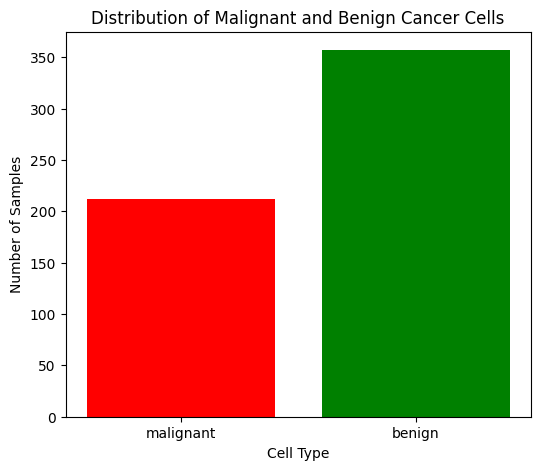

In [5]:
#Visualizes the benign and malignant data
plt.figure(figsize=(6, 5))
plt.bar(category_names, counts, color=['red', 'green'])
plt.xlabel('Cell Type')
plt.ylabel('Number of Samples')
plt.title('Distribution of Malignant and Benign Cancer Cells')
plt.show()

In [7]:
#Preprocessing of the data to remove the "worst radius" through "worst fractal dimension" columns
#Creates two dataframes from the split data to be used as training and testing data as well
df = pd.DataFrame(data.data, columns=data.feature_names)

start_col = "worst radius"
end_col = "worst fractal dimension"

worst_df = df.loc[:, start_col:end_col]
best_df = df.drop(columns=worst_df.columns)

X_worst = worst_df
y_worst = data.target

X_best = best_df
y_best = data.target

#Splits up the training and testing data based on the full dataset, and the two split ones
#The "worst" dataset just has the columns with "worst" in the name removed and the "best" dataset is what's leftover
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(data.data, data.target, test_size=0.33, random_state=42)
X_train_worst, X_test_worst, y_train_worst, y_test_worst = train_test_split(X_worst, y_worst, test_size=0.33, random_state=42)
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y_best, test_size=0.33, random_state=42)

model_names = ["Naive Bayes", "K-Nearest Neighbors", "Logistic Regression"]

In [8]:
#Defined a function to train the Naive Bayes, K-Nearest Neighbors, and Logistic Regression Models
def model_fitting(X_train, y_train):
    model_nb = GaussianNB()
    fitted_nb = model_nb.fit(X_train, y_train)

    model_knn = KNeighborsClassifier(n_neighbors = 5)
    fitted_knn = model_knn.fit(X_train, y_train)

    model_logreg = LogisticRegression(max_iter=10000)
    fitted_logreg = model_logreg.fit(X_train, y_train)
    
    return fitted_nb, fitted_knn, fitted_logreg

In [9]:
#Defined a  function to use a given model, its training and testing data, and display the accuracy
#There is also a check for overfitting based on the difference in model accuracy using its training and testing data
def model_testing(model_name, model, X_train, X_test, y_train, y_test):
    model_test_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    model_test_accuracy = round(accuracy_score(y_test, model_test_pred)*100, 2)
    model_train_accuracy = round(accuracy_score(y_train, model_train_pred)*100, 2)
    #print("{} Model Testing Data Accuracy: {}%".format(model_name, model_test_accuracy))
    #print("{} Model Training Data Accuracy: {}%".format(model_name, model_train_accuracy))
    if abs(model_train_accuracy - model_test_accuracy) > 20:
        print("Model is Overfitted")
        
    return model_test_accuracy


In [16]:
#Function to plot and rank each model on a podium
def podium_rank(names, scores):
   # Step 1: Input data

    # Step 2: Rank the scores
    ranked = sorted(zip(names, scores), key = lambda x: x[1], reverse = True)
    # ranked = [('Bob', 91), ('Alice', 84), ('Charlie', 77)]

    # Step 3: Arrange for podium: [2nd, 1st, 3rd]
    podium_order = [ranked[1], ranked[0], ranked[2]]
    positions = ["2nd", "1st", "3rd"]
    colors = ["silver", "gold", "peru"]

    # Extract names and scores in podium order
    podium_names = [x[0] for x in podium_order]
    podium_scores = [x[1] for x in podium_order]

    # Optional: exaggerate podium height differences
    height_gap = 5
    base_height = 10
    heights = [base_height, base_height + height_gap, base_height - 3]

    # Step 4: Plot
    plt.figure(figsize = (6, 6))
    bars = plt.bar([0, 1, 2], heights, color = colors, width = 0.2)

    for bar, pos, name, score in zip(bars, positions, podium_names, podium_scores):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                 "{}\n{}\n Model Accuracy: {}%".format(pos, name, score),
                 ha = "center", va = "bottom", fontsize = 12, weight = "bold", color = "black")
    # Cleanup
    plt.xticks([])
    plt.yticks([])
    plt.ylim(0, max(heights) + 6)
    plt.title("Model Rankings", fontsize=14, color="black")
    plt.box(False)
    plt.show()

Full Dataset Results




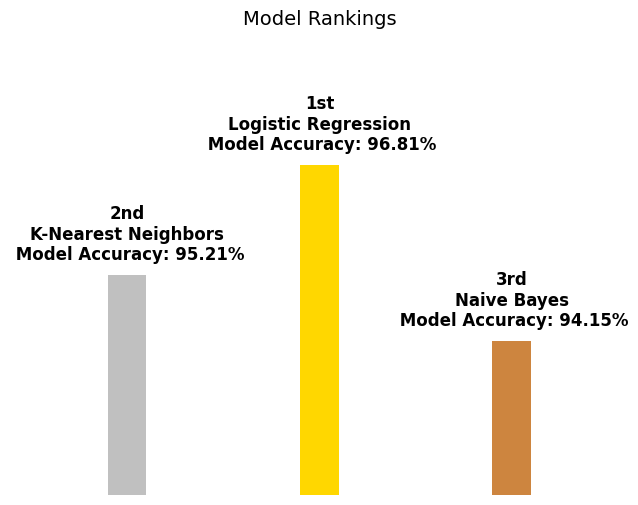

In [18]:
print("Full Dataset Results")
nb_full = model_fitting(X_train_full, y_train_full)[0]
knn_full = model_fitting(X_train_full, y_train_full)[1]
logreg_full = model_fitting(X_train_full, y_train_full)[2]

ranking_full = []

ranking_full.append(model_testing("Naive Bayes", nb_full, X_train_full, X_test_full, y_train_full, y_test_full))
ranking_full.append(model_testing("K-Nearest Neighbors", knn_full, X_train_full, X_test_full, y_train_full, y_test_full))
ranking_full.append(model_testing("Logistic Regression", logreg_full, X_train_full, X_test_full, y_train_full, y_test_full))
print("\n")
podium_rank(model_names, ranking_full)

#Below are the model results using different sets of training and testing data

'worst' Dataset Results




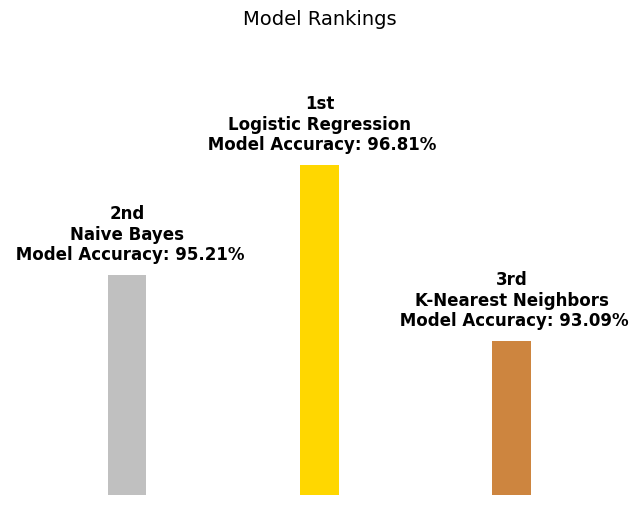

In [19]:
print("'worst' Dataset Results")
nb_worst = model_fitting(X_train_worst, y_train_worst)[0]
knn_worst = model_fitting(X_train_worst, y_train_worst)[1]
logreg_worst = model_fitting(X_train_worst, y_train_worst)[2]

ranking_worst = []

ranking_worst.append(model_testing("Naive Bayes", nb_worst, X_train_worst, X_test_worst, y_train_worst, y_test_worst))
ranking_worst.append(model_testing("K-Nearest Neighbors", knn_worst, X_train_worst, X_test_worst, y_train_worst, y_test_worst))
ranking_worst.append(model_testing("Logistic Regression", logreg_worst, X_train_worst, X_test_worst, y_train_worst, y_test_worst))
print("\n")
podium_rank(model_names, ranking_worst)


'best' Dataset Results


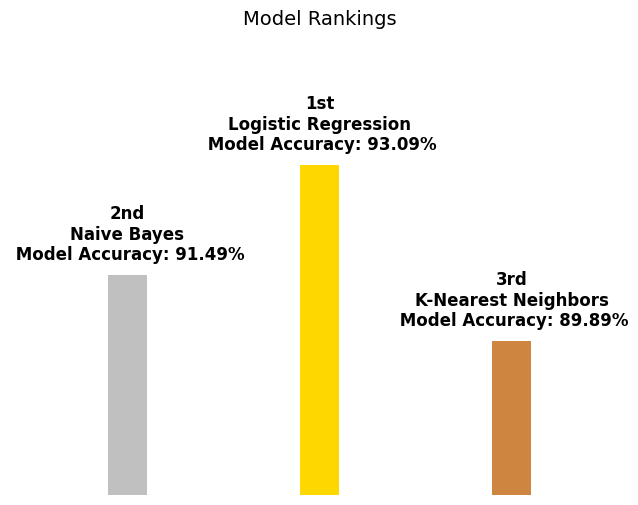

In [20]:
print("'best' Dataset Results")
nb_best = model_fitting(X_train_best, y_train_best)[0]
knn_best = model_fitting(X_train_best, y_train_best)[1]
logreg_best = model_fitting(X_train_best, y_train_best)[2]

ranking_best = []

ranking_best.append(model_testing("Naive Bayes", nb_best, X_train_best, X_test_best, y_train_best, y_test_best))
ranking_best.append(model_testing("K-Nearest Neighbors", knn_best, X_train_best, X_test_best, y_train_best, y_test_best))
ranking_best.append(model_testing("Logistic Regression", logreg_best, X_train_best, X_test_best, y_train_best, y_test_best))
print("\n")
podium_rank(model_names, ranking_best)